In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
df=pd.read_csv('/content/marital status.csv')

In [53]:
df

,age,status
0,21,0.0
1,33,1.0
2,24,0.0
3,28,1.0
4,17,0.0
5,33,1.0
6,23,0.0
7,30,0.0
8,29,1.0
9,22,0.0


In [54]:
df.shape

(20, 2)

In [55]:
df.isnull().sum()

age       0
status    1
dtype: int64

In [56]:
fill=df['status'].median()

In [57]:
fill

0.0

In [58]:
df.status=df.status.fillna(fill)

In [59]:
df

,age,status
0,21,0.0
1,33,1.0
2,24,0.0
3,28,1.0
4,17,0.0
5,33,1.0
6,23,0.0
7,30,0.0
8,29,1.0
9,22,0.0


In [60]:
df.isnull().sum()

age       0
status    0
dtype: int64

In [61]:
df['status'].value_counts()

0.0    11
1.0     9
Name: status, dtype: int64

In [62]:
x=df[['age']]

In [63]:
x

,age
0,21
1,33
2,24
3,28
4,17
5,33
6,23
7,30
8,29
9,22


In [64]:
y=df['status']

In [65]:
y

0     0.0
1     1.0
2     0.0
3     1.0
4     0.0
5     1.0
6     0.0
7     0.0
8     1.0
9     0.0
10    1.0
11    0.0
12    0.0
13    0.0
14    1.0
15    1.0
16    0.0
17    0.0
18    1.0
19    1.0
Name: status, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=1)

In [67]:
from sklearn.linear_model import LogisticRegression
r=LogisticRegression()
r.fit(X_train,y_train)
pred=r.predict(X_test)

In [68]:
r.score(X_test,y_test)

0.8333333333333334

In [69]:
r.predict_proba(X_test)

array([[0.28697051, 0.71302949],
       [0.9902967 , 0.0097033 ],
       [0.80161052, 0.19838948],
       [0.50311753, 0.49688247],
       [0.71810555, 0.28189445],
       [0.02465085, 0.97534915]])

In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
import itertools

In [71]:

accuracy_score(y_test,pred)

0.8333333333333334

In [72]:
cnf_matrix=confusion_matrix(y_test,pred)
cnf_matrix

array([[3, 0],
       [1, 2]])

In [74]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86         3
         1.0       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



Text(0.5, 257.44, 'Predicted label')

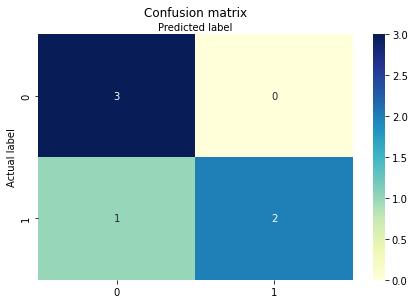

In [76]:
 import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')